In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

#,'^BVSP','PETR4.SA'

In [14]:
'''a linha abaixo nos dá todos os tickers de ações que fizeram parte do índice bovespa no período 2021 à 2022
'''
W=pd.read_csv('Acoes_ibov.csv')
inicio= "2021-01-01"
fim= "2022-01-01"

'''
Lista de ativos que faram parte da  carteira hipotética
'''
carteira = ['ABEV3.SA','WEGE3.SA','BBAS3.SA','KLBN11.SA','PETR3.SA','GGBR4.SA']
'''
Coleta dos preços de fechamento ajustado dos ativos de acordo com o período pre-definido
'''

data = yf.download(carteira, start=inicio, end=fim )['Adj Close']
data

[*********************100%%**********************]  6 of 6 completed


,ABEV3.SA,BBAS3.SA,GGBR4.SA,KLBN11.SA,PETR3.SA,WEGE3.SA
Date,,,,,,
2021-01-04,14.085717,30.328728,18.521002,22.560926,12.135617,35.731384
2021-01-05,14.385996,30.014074,18.969091,22.405037,12.505857,37.924507
2021-01-06,14.677172,30.699877,19.879490,22.829407,12.649839,38.930073
2021-01-07,14.604377,31.918188,21.010386,24.041893,13.020079,40.538986
2021-01-08,15.041145,32.103760,20.697435,25.020544,12.995396,42.990673
...,...,...,...,...,...,...
2021-12-23,14.771684,25.399118,21.546169,22.741863,15.342544,32.422081
2021-12-27,14.752684,25.451273,21.746042,22.882681,15.644959,32.131474
2021-12-28,14.743185,25.303503,21.658098,22.583447,15.655039,32.247719


In [15]:
''' 
Cálculo dos retornos logarítimos diário de cada ativo
'''
log_retorno=np.log(data).diff()
log_retorno

,ABEV3.SA,BBAS3.SA,GGBR4.SA,KLBN11.SA,PETR3.SA,WEGE3.SA
Date,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.021094,-0.010429,0.023906,-0.006934,0.030052,0.059568
2021-01-06,0.020038,0.022592,0.046878,0.018764,0.011447,0.026170
2021-01-07,-0.004972,0.038917,0.055328,0.051748,0.028848,0.040497
2021-01-08,0.029468,0.005797,-0.015007,0.039899,-0.001898,0.058719
...,...,...,...,...,...,...
2021-12-23,0.010343,-0.003758,-0.019475,-0.008478,0.007254,-0.005957
2021-12-27,-0.001287,0.002051,0.009234,0.006173,0.019519,-0.009004
2021-12-28,-0.000644,-0.005823,-0.004052,-0.013163,0.000644,0.003611


In [30]:
'''
Vetor de pesos contendo os retornos médios anualizados para cada ativo.
'''
log_retorno_medio_anual=log_retorno.mean()*252
log_retorno_medio_anual

ABEV3.SA     0.040111
BBAS3.SA    -0.194761
GGBR4.SA     0.166699
KLBN11.SA    0.003415
PETR3.SA     0.248917
WEGE3.SA    -0.114668
dtype: float64

In [31]:
'''
Calculo da matriz de covariância dos ativos
'''
covariancia=log_retorno.cov()*252
covariancia

,ABEV3.SA,BBAS3.SA,GGBR4.SA,KLBN11.SA,PETR3.SA,WEGE3.SA
ABEV3.SA,0.088738,0.043028,0.027446,0.010458,0.044865,0.027994
BBAS3.SA,0.043028,0.103466,0.036475,0.001350,0.089759,0.025715
GGBR4.SA,0.027446,0.036475,0.145066,0.034922,0.061039,0.036151
KLBN11.SA,0.010458,0.001350,0.034922,0.080770,-0.000108,0.023409
PETR3.SA,0.044865,0.089759,0.061039,-0.000108,0.198780,0.035180
WEGE3.SA,0.027994,0.025715,0.036151,0.023409,0.035180,0.119110


In [33]:
'''
Criação dos 10000 vetores dos pesos. 
Cada linha do dataframe representa um vetor de pesos. A soma dos valores em cada vetor é igual a 1 e seus valores variam de 0 a
1
'''

pesos = np.random.randint(1,101, size=(10000,len(data.columns)))
pesos= pesos / np.sum(pesos, axis=1, keepdims=True)

'''
Criação de um dataframe onde cada linha representa uma carteira hipotético. As colunas de 0 a 5 são os pesos de cada ativo, já as
colunas 6 representa o retorno da carteira e a 7 representa o risco.
'''
simulaçoes= pd.DataFrame(pesos, columns=data.columns)
simulaçoes['Retorno_da_carteira']=''
simulaçoes['Risco_da_carteira']=''

In [21]:
simulaçoes

,ABEV3.SA,BBAS3.SA,GGBR4.SA,KLBN11.SA,PETR3.SA,WEGE3.SA,Retorno_da_carteira,Risco_da_carteira
0,0.227528,0.280899,0.154494,0.224719,0.042135,0.070225,,
1,0.189286,0.203571,0.117857,0.071429,0.196429,0.221429,,
2,0.079320,0.269122,0.223796,0.215297,0.130312,0.082153,,
3,0.206215,0.248588,0.025424,0.144068,0.262712,0.112994,,
4,0.108642,0.244444,0.197531,0.224691,0.041975,0.182716,,
...,...,...,...,...,...,...,...,...
9995,0.391489,0.182979,0.004255,0.042553,0.102128,0.276596,,
9996,0.021845,0.169903,0.223301,0.150485,0.191748,0.242718,,
9997,0.194444,0.277778,0.005556,0.027778,0.027778,0.466667,,
9998,0.266304,0.152174,0.021739,0.413043,0.081522,0.065217,,


In [38]:
'''
interage pela tabela de vetor de pesos
'''
for i in range(pesos.shape[0]):
    '''
    Cria o retorno da carteira a partir da multiplicação dos vetores de pesos pelo vetor de retornos anualizado
    '''
    simulaçoes.at[i,'Retorno_da_carteira']= np.exp(np.sum(pesos[i]*log_retorno_medio_anual))
    '''
    Cria o risco a partir da multiplicação do vetor de peso pela matriz de covariância, o resultado é multiplicado pelo vetor de 
    pesos transposto
    '''
    
    simulaçoes.at[i,'Risco_da_carteira']= np.sqrt(np.dot(pesos[i].T,np.dot(covariancia,pesos[i])))


In [41]:

carteira_otima=simulaçoes[simulaçoes['Risco_da_carteira'] == simulaçoes['Risco_da_carteira'].min()]

In [54]:
'''
Pesos da carteira ótima
'''

carteira_otima[['ABEV3.SA','WEGE3.SA','BBAS3.SA','KLBN11.SA','PETR3.SA','GGBR4.SA']]

,ABEV3.SA,WEGE3.SA,BBAS3.SA,KLBN11.SA,PETR3.SA,GGBR4.SA
8607,0.249042,0.153257,0.16092,0.383142,0.02682,0.02682


Text(0, 0.5, 'Expectativa de Retornos')

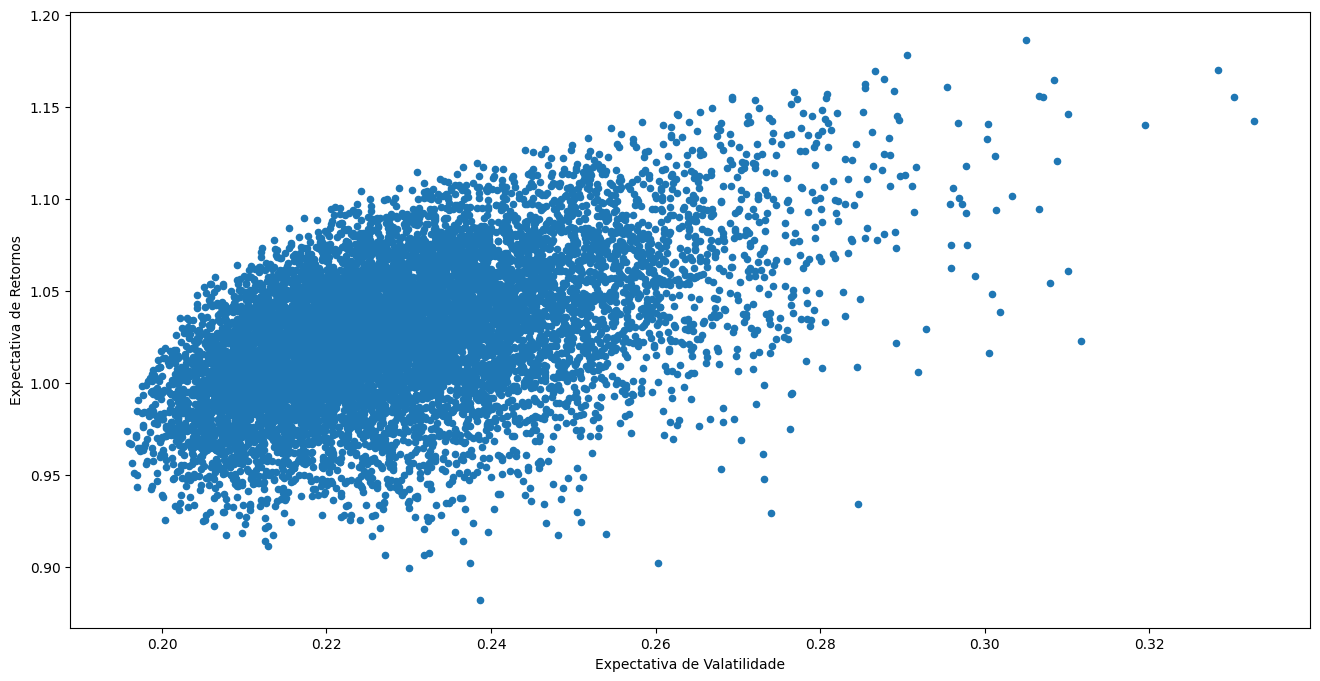

In [40]:
simulaçoes.plot(x='Risco_da_carteira', y='Retorno_da_carteira', kind='scatter',figsize=(16,8))
plt.xlabel('Expectativa de Valatilidade')
plt.ylabel('Expectativa de Retornos')